In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle
import plotly.express as px
import streamlit as st
from sklearn.preprocessing import MinMaxScaler


In [4]:
raw_data=pd.read_csv("Churn_Modelling.csv")

In [5]:
raw_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# data preprocessing

In [6]:
for column in raw_data:
    uniqueval=np.unique(raw_data[column].fillna("0"))
    val_length=len(uniqueval)
    if val_length<=12:
        print("the number of values for features {} :{} --{}".format(column,val_length,uniqueval))
    else:
        print("the number of values for features {} :{}".format(column,val_length))

the number of values for features RowNumber :10000
the number of values for features CustomerId :10000
the number of values for features Surname :2932
the number of values for features CreditScore :460
the number of values for features Geography :3 --['France' 'Germany' 'Spain']
the number of values for features Gender :2 --['Female' 'Male']
the number of values for features Age :70
the number of values for features Tenure :11 --[ 0  1  2  3  4  5  6  7  8  9 10]
the number of values for features Balance :6382
the number of values for features NumOfProducts :4 --[1 2 3 4]
the number of values for features HasCrCard :2 --[0 1]
the number of values for features IsActiveMember :2 --[0 1]
the number of values for features EstimatedSalary :9999
the number of values for features Exited :2 --[0 1]


In [7]:
raw_data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


# EXPLORATORY DATA ANALYSIS


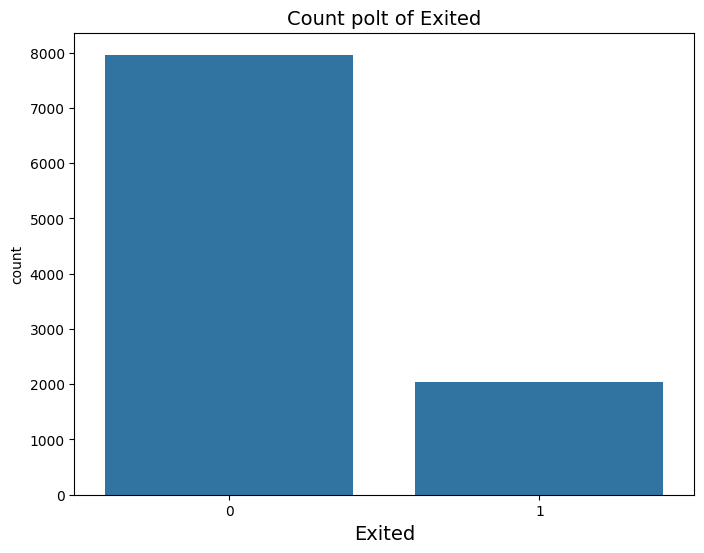

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(data=raw_data,x="Exited")
plt.title("Count polt of Exited",fontsize=14)
plt.xlabel("Exited",fontsize=14)
plt.ylabel("count")
plt.xticks([0,1],label=["not Exited", "Exited"])
plt.show()

# this data is imbalanced

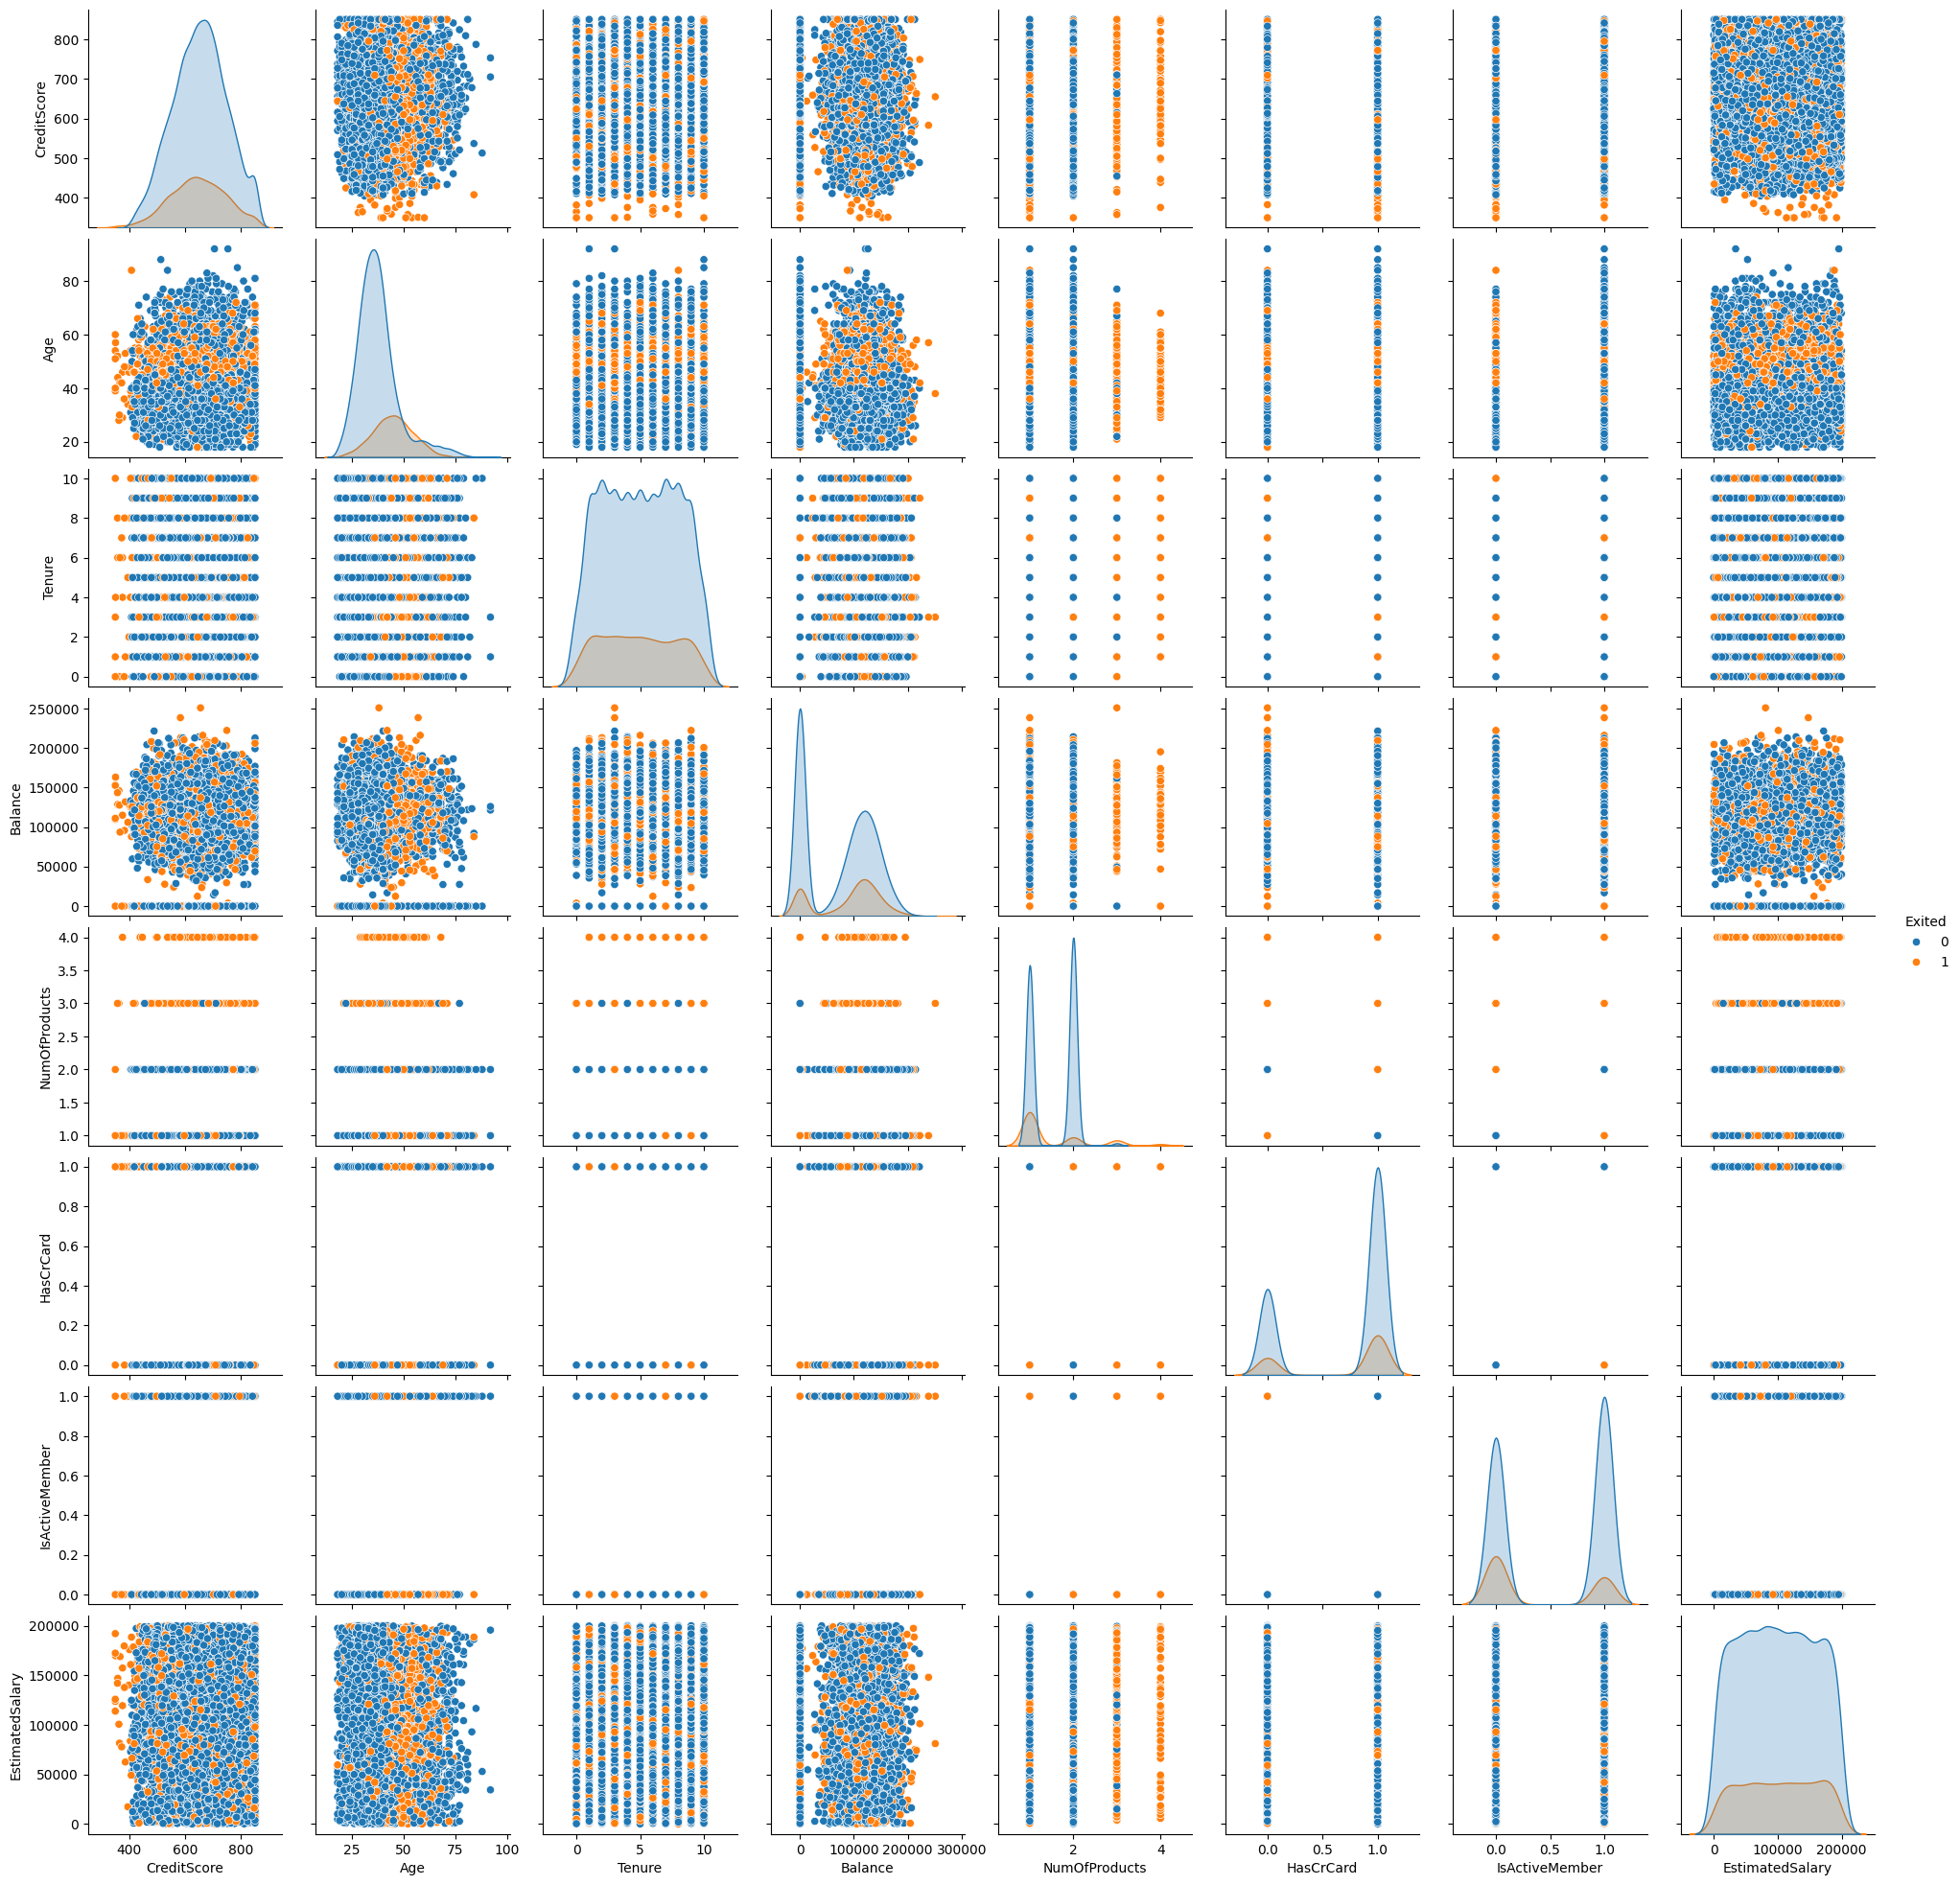

In [9]:
raw_data_a=raw_data[["CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"]]
p=sns.pairplot(raw_data_a,hue="Exited")

# good variables: crid score - age, crid score-no of products, age-estimated saliary

# investige non numeric data with y-target veriable

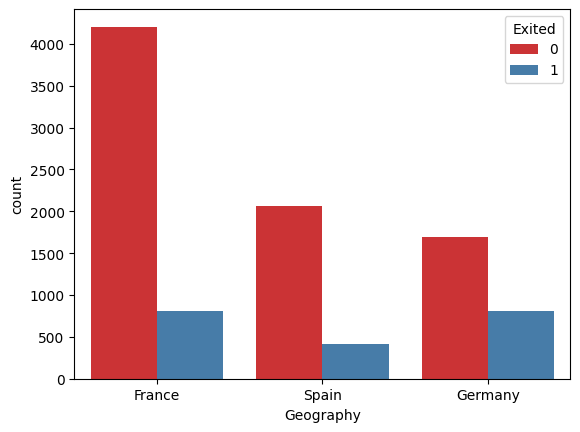

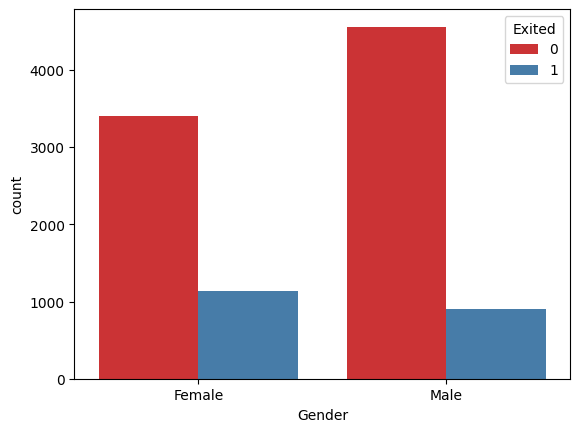

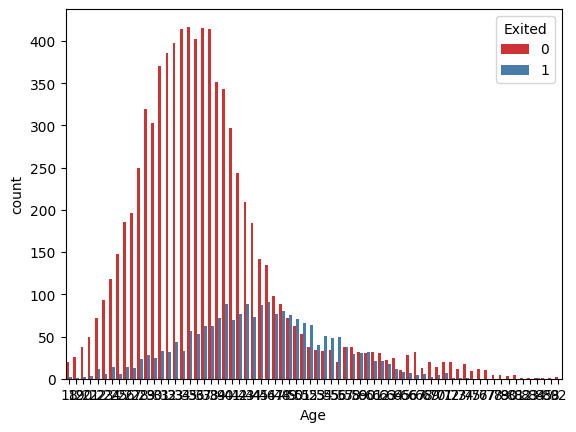

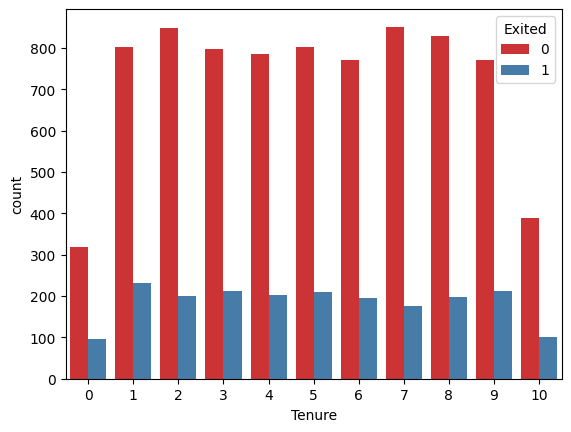

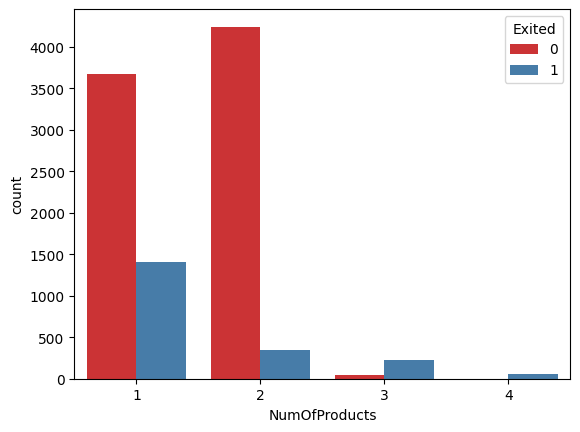

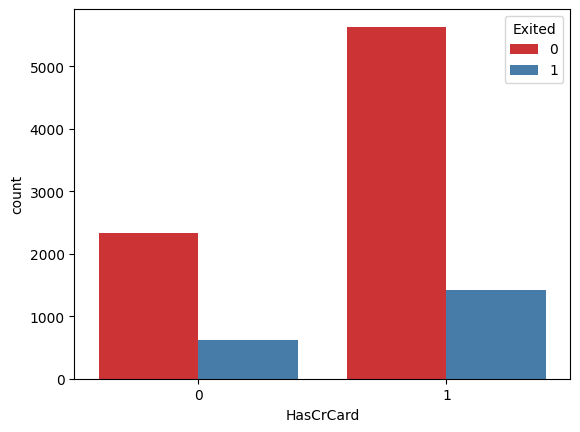

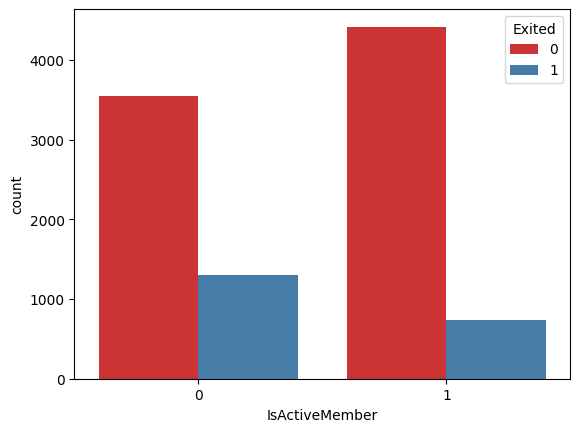

In [10]:
features=["Geography","Gender","Age","Tenure","NumOfProducts","HasCrCard","IsActiveMember"]
for f in features:
    plt.figure()
    ax=sns.countplot(x=f,data=raw_data_a,hue="Exited",palette="Set1")

 # investige  numeric data with y-target veriable

the median: 652.0


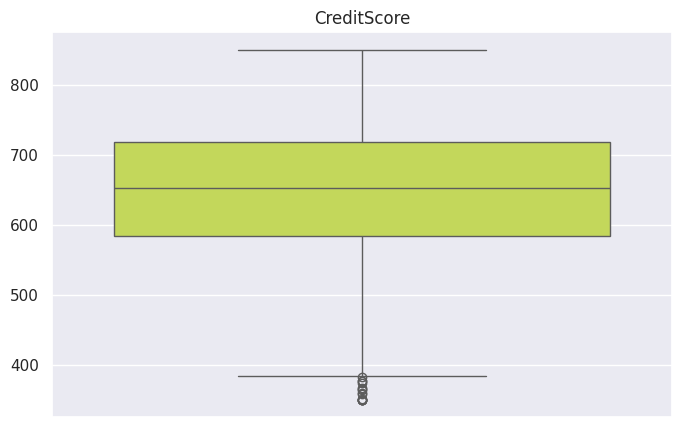

the median: 37.0


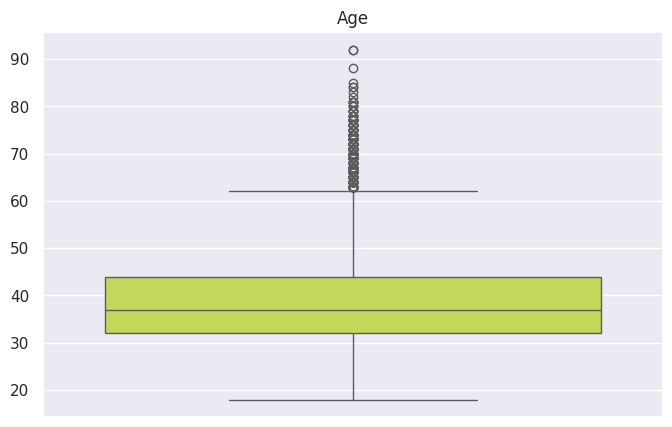

the median: 5.0


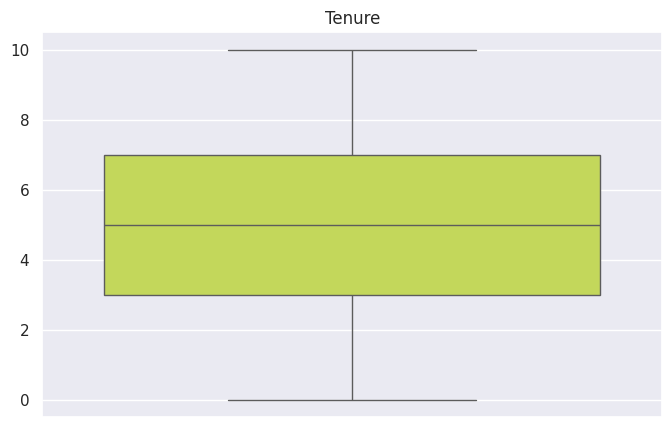

the median: 97198.54000000001


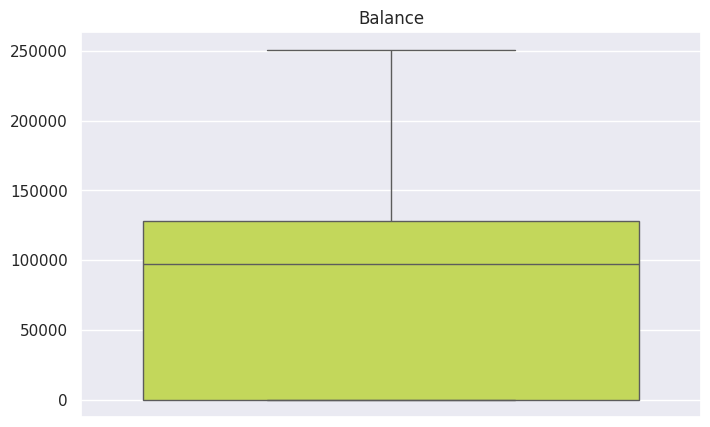

the median: 1.0


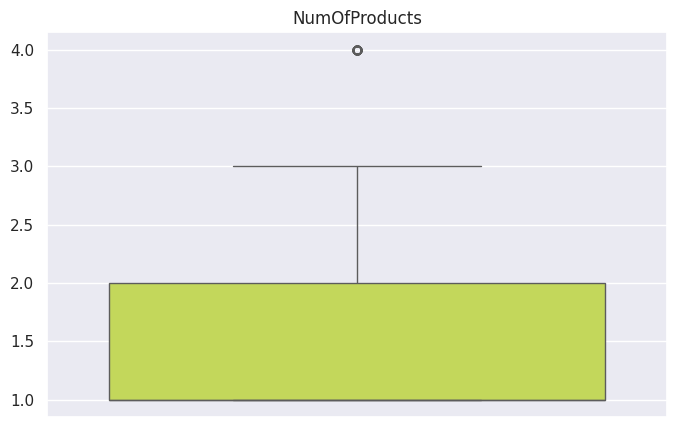

the median: 1.0


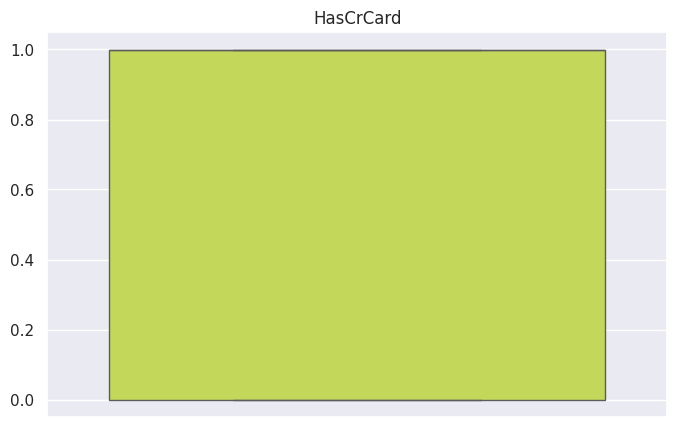

the median: 1.0


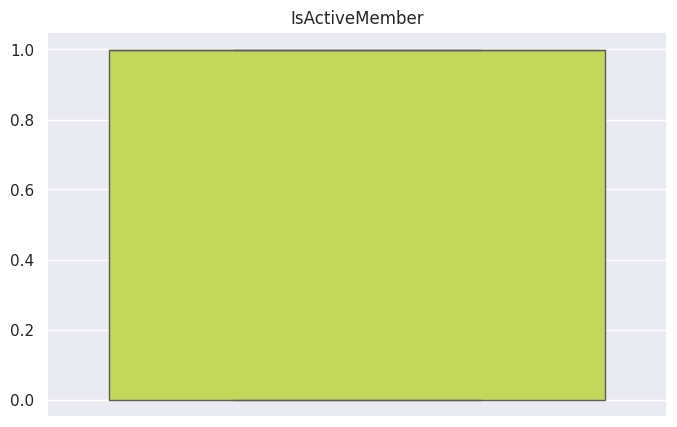

the median: 100193.915


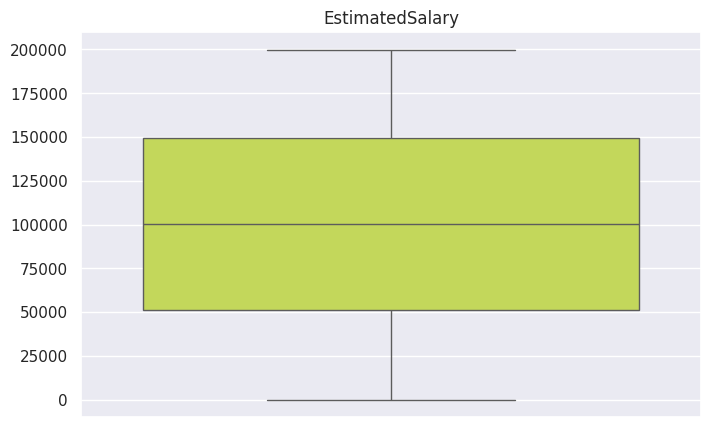

the median: 0.0


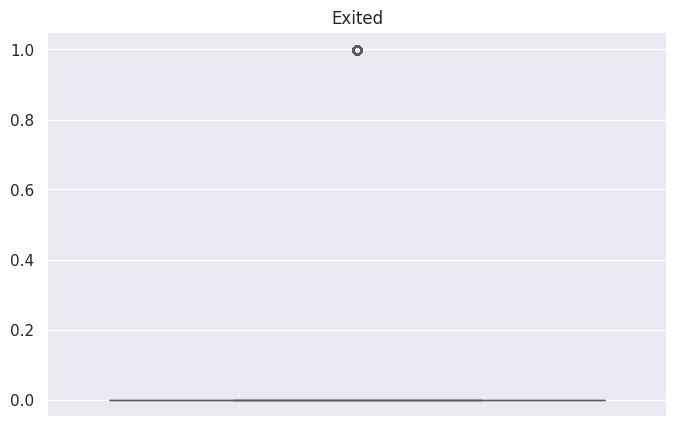

In [11]:
numeric=["int16","int32","int64","float16","float32","float64"]
n_veriable=raw_data_a.select_dtypes(include=numeric).columns
sns.set(rc={"figure.figsize":(8,5)})
for c in n_veriable:
    x=raw_data_a[c].values
    ax=sns.boxplot(x,color="#D1EC46")
    print("the median:",raw_data_a[c].median())
    plt.title(c)
    plt.show()

In [12]:
new_raw_data=pd.get_dummies(raw_data_a,columns=["Geography","Gender","HasCrCard","IsActiveMember"])
scale_vars=["CreditScore","EstimatedSalary","Tenure","Balance","Age","NumOfProducts"]
scaler=MinMaxScaler()
new_raw_data[scale_vars]=scaler.fit_transform(new_raw_data[scale_vars])
new_raw_data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,1,True,False,False,True,False,False,True,False,True
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0,False,False,True,True,False,True,False,False,True
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654,1,True,False,False,True,False,False,True,True,False
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0,True,False,False,True,False,True,False,True,False
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0,False,False,True,True,False,False,True,False,True
5,0.590,0.351351,0.8,0.453394,0.333333,0.748797,1,False,False,True,False,True,False,True,True,False
6,0.944,0.432432,0.7,0.000000,0.333333,0.050261,0,True,False,False,False,True,False,True,False,True
7,0.052,0.148649,0.4,0.458540,1.000000,0.596733,1,False,True,False,True,False,False,True,True,False
8,0.302,0.351351,0.4,0.566170,0.333333,0.374680,0,True,False,False,False,True,True,False,False,True
9,0.668,0.121622,0.2,0.536488,0.000000,0.358605,0,True,False,False,False,True,False,True,False,True


# Baseline XGboost model

Training Accuracy: 0.96
Testing Accuracy: 0.86


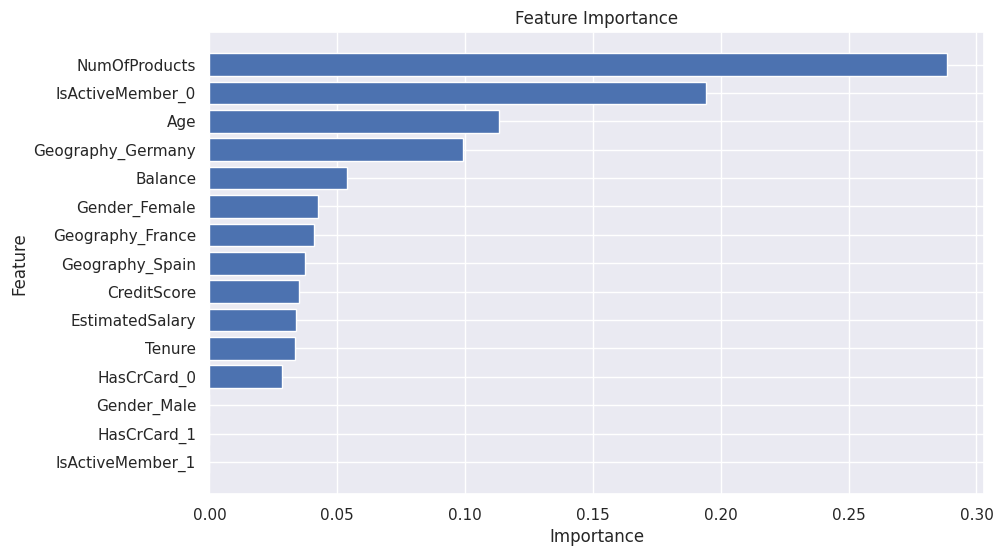


Feature Importance:


,Feature,Importance
4,NumOfProducts,0.288658
13,IsActiveMember_0,0.194039
1,Age,0.113240
7,Geography_Germany,0.099048
3,Balance,0.053883
9,Gender_Female,0.042302
6,Geography_France,0.041067
8,Geography_Spain,0.037478
0,CreditScore,0.034965
5,EstimatedSalary,0.033707


In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Features (X) and Target (y)
X = new_raw_data.drop(columns=["Exited"])
y = new_raw_data["Exited"]

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training and Testing Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Feature Importance
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], align="center")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Displaying feature importance
print("\nFeature Importance:")
feature_importance

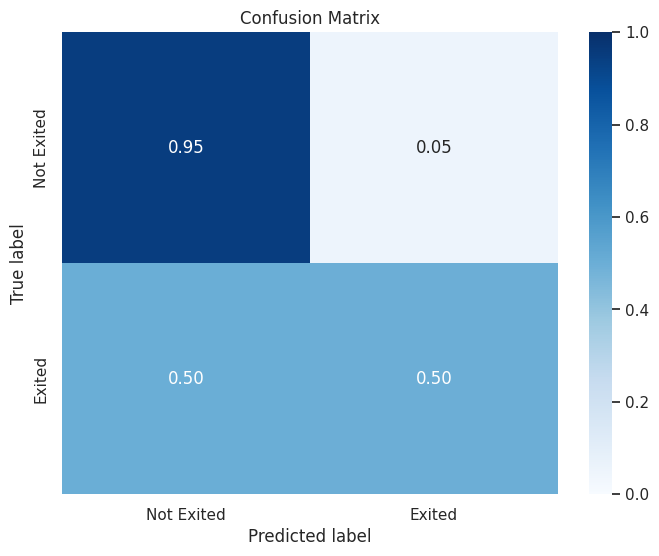

In [14]:
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    """Plots a confusion matrix."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0, vmax=1, annot=True, cmap="Blues", fmt='.2f')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, normalize='true')
plot_confusion_matrix(cm, classes=["Not Exited", "Exited"])

even though traning accuracy is 86 percent we can see from the confusion matrix that, the model is not predicting well for the proples which are Exited

SMOTE creates synthetic (artificial) data points for the minority class.

Imagine you're building a model to detect fraudulent credit card transactions. In a real-world dataset, the vast majority of transactions will be legitimate, while only a tiny fraction will be fraudulent. This is an imbalanced dataset. If you train a model on this data, it might become very good at identifying legitimate transactions but terrible at catching fraudulent ones, simply because it hasn't seen enough examples of fraud. This can lead to a model that appears accurate but is practically useless.

#Visualizing a Simple Decision Tree

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


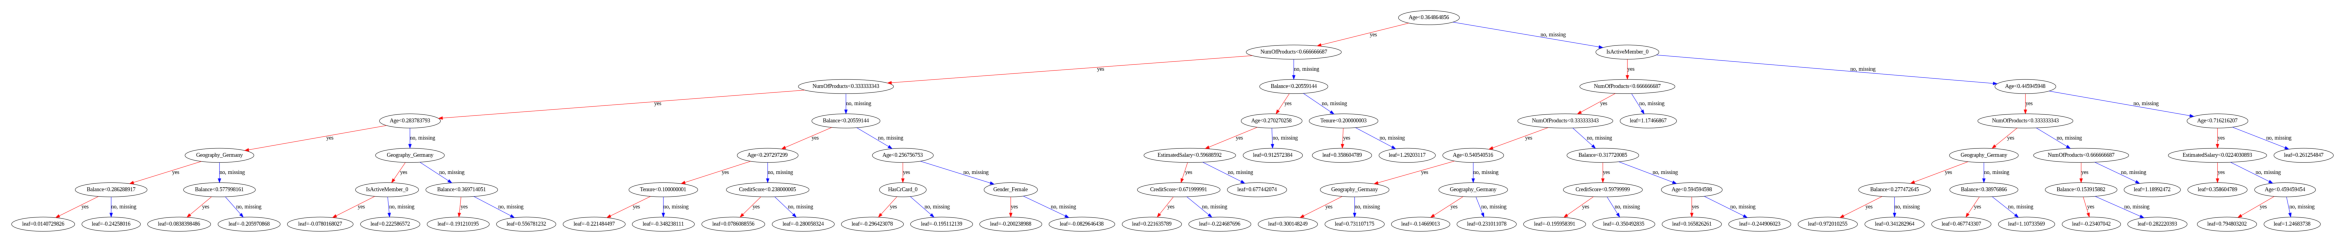

In [15]:
import xgboost as xgb
from PIL import Image

# Export the first tree in the ensemble to DOT format
dot_data = xgb.to_graphviz(model, num_trees=0)

# Save and display the tree
output_file = "xgboost_tree"
dot_data.render(output_file, format="png", view=False)  # Saves 'xgboost_tree.png'

# Display the tree image using PIL (for inline visualization in Jupyter or Python)
img = Image.open(f"{output_file}.png")
plt.figure(figsize=(30, 30))
plt.imshow(img)
plt.axis("off")
plt.show()

Training Accuracy: 0.85
Testing Accuracy: 0.85


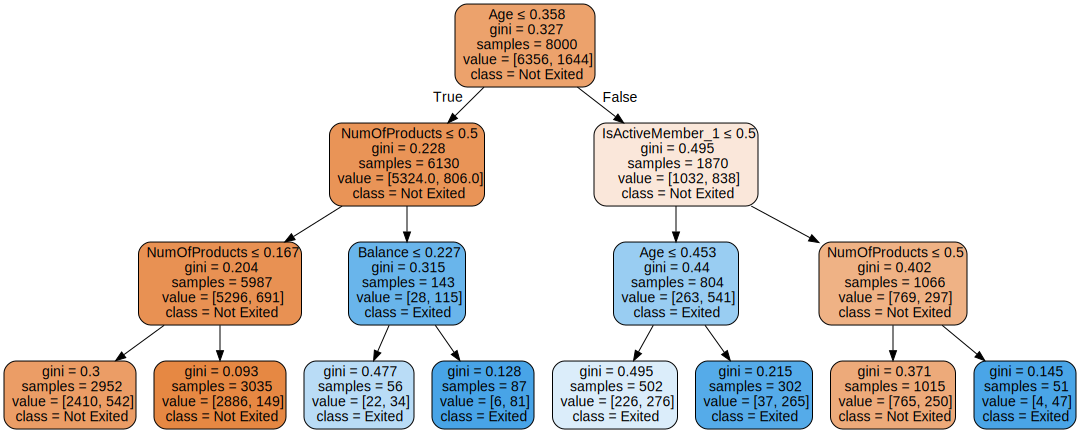

In [16]:
# Tree visual is not easy to read so we will train a simple DT to visual the tree:

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Train a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=3)  # Adjust max_depth for simplicity
dt.fit(X_train, y_train)

# Predictions and evaluation
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Export the decision tree to DOT format
dot_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=new_raw_data.drop("Exited", axis=1).columns,
    class_names=["Not Exited", "Exited"],
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualize the tree using Graphviz
graph = graphviz.Source(dot_data)
graph

#Resampling with SMOTE


Training Accuracy: 0.97
Testing Accuracy: 0.85


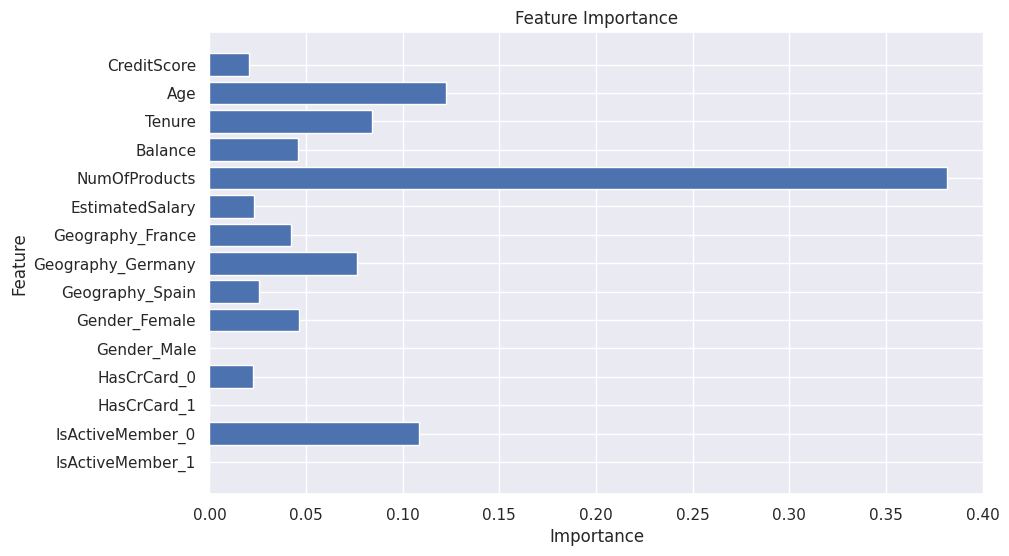

In [17]:
# 4. Re-Running XGBoost using SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Applying SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost classifier
model = XGBClassifier( eval_metric='logloss', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test)

# Training and Testing Accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Plotting Feature Importance
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importance, align='center')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

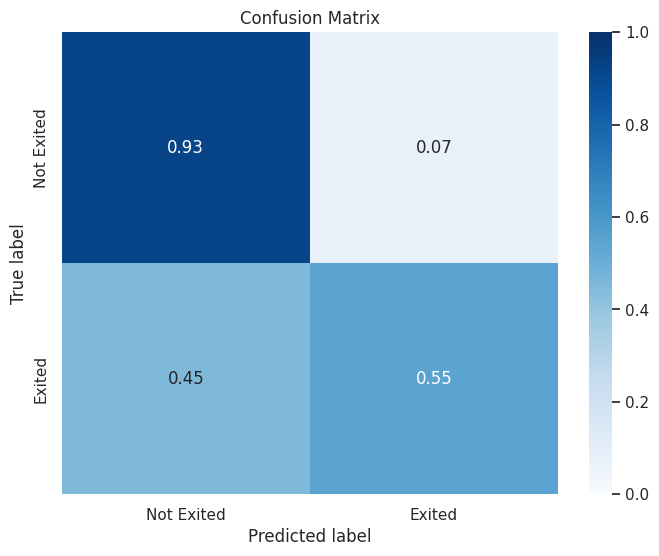

In [18]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, normalize='true')
plot_confusion_matrix(cm, classes=["Not Exited", "Exited"])

still didnt work
lets try scale_pos_weight

Calculated scale_pos_weight: 3.91



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:26:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix for XGBoost with Class Weighting:


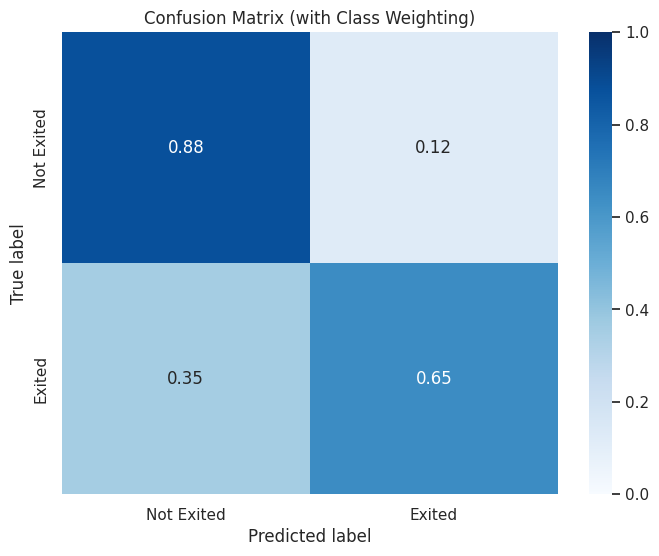

In [19]:
# ## 4a. Re-Running XGBoost with Class Weighting (scale_pos_weight)

# --- 1. Calculate the scale_pos_weight value ---
# This should be done on original target variable 'y' before splitting
scale_pos_weight_value = y.value_counts()[0] / y.value_counts()[1]
print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}\n")

# --- 2. Initialize and Train the XGBoost model ---
# We use the original (un-resampled) training data: X_train, y_train
model_weighted = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight_value,  # The key parameter
    random_state=42
)

model_weighted.fit(X_train, y_train)

# --- 3. Make Predictions and Evaluate ---
y_test_pred_weighted = model_weighted.predict(X_test)

# Calculate and plot the new confusion matrix
print("Confusion Matrix for XGBoost with Class Weighting:")
cm_weighted = confusion_matrix(y_test, y_test_pred_weighted, normalize='true')
plot_confusion_matrix(cm_weighted, classes=["Not Exited", "Exited"], title="Confusion Matrix (with Class Weighting)")

#precision-recall trade-off
Old Model: A relaxed guard who assumes everyone is a visitor. They are correct 92% of the time for legitimate visitors (Not Exited) but let in many intruders, only catching 55% of them (Exited).

New scale_pos_weight Model: A more vigilant guard. They are now more suspicious. They catch more intruders (65% of the Exited class), but in the process, they might inconvenience a few legitimate visitors, causing their accuracy on that group to drop slightly (to 88%).

#Voting Classifier

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:26:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix for the Ensemble Model:


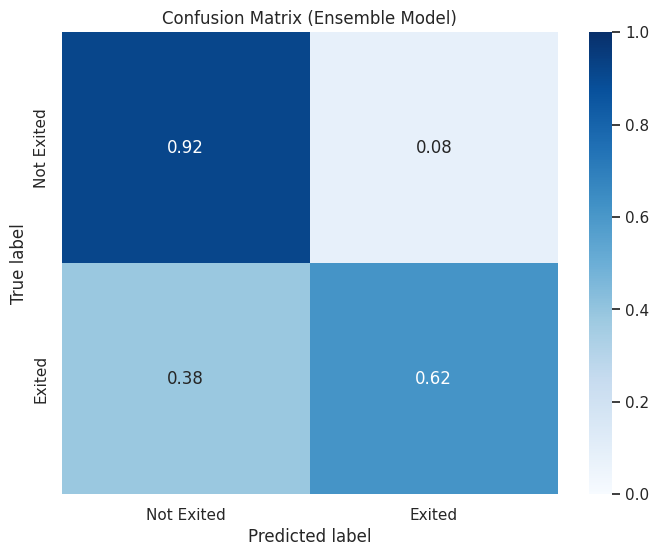

In [20]:
# ## 5. Building an Ensemble Model (Voting Classifier)

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# --- 1. Initialize the individual models ---

# We'll use parameters to help each model handle the class imbalance
scale_pos_weight_value = y.value_counts()[0] / y.value_counts()[1] # From your previous step

# Model 1: Logistic Regression
clf1 = LogisticRegression(
    random_state=42,
    class_weight='balanced', # Helps with imbalance
    solver='liblinear'
)

# Model 2: Random Forest
clf2 = RandomForestClassifier(
    random_state=42,
    class_weight='balanced' # Helps with imbalance
)

# Model 3: Your best XGBoost model
clf3 = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight_value,
    random_state=42
)


# --- 2. Create the Ensemble Voting Classifier ---
# We use 'soft' voting to average the predicted probabilities, which is often more powerful
ensemble_model = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3)],
    voting='soft'
)


# --- 3. Train the Ensemble Model ---
# We train on the original (un-resampled) training data
ensemble_model.fit(X_train, y_train)


# --- 4. Make Predictions and Evaluate ---
y_test_pred_ensemble = ensemble_model.predict(X_test)

# Calculate and plot the new confusion matrix for the ensemble
print("Confusion Matrix for the Ensemble Model:")
cm_ensemble = confusion_matrix(y_test, y_test_pred_ensemble, normalize='true')
plot_confusion_matrix(cm_ensemble, classes=["Not Exited", "Exited"], title="Confusion Matrix (Ensemble Model)")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:26:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:27:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:27:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:27:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:27:04] WARNING: /w

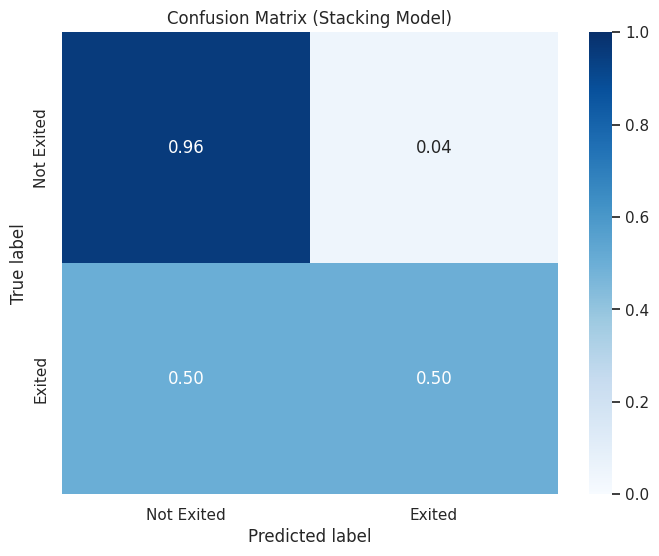

In [21]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Your base models (estimators) are the same as before
estimators = [
    ('lr', clf1),
    ('rf', clf2),
    ('xgb', clf3)
]

# The meta-model learns to combine the base model predictions
# Logistic Regression is a common choice for the final_estimator
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Fit and evaluate the stacking model
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

# Check the confusion matrix for the stacking model
cm_stacking = confusion_matrix(y_test, y_pred_stacking, normalize='true')

# Corrected function call:
plot_confusion_matrix(
    cm_stacking,
    classes=["Not Exited", "Exited"],
    title="Confusion Matrix (Stacking Model)"
)

hyperparameters


In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

print("--- Starting Hyperparameter Tuning for the Weighted Model ---")

# 1. Define the Parameter Grid for the Search
# This grid includes a range of values for the most important XGBoost parameters.
# We also include 'scale_pos_weight' to let the tuner find the optimal value.
param_grid = {
    "n_estimators": [100, 200, 300, 400],      # Number of trees in the forest
    "max_depth": [4, 5, 7, 10],            # Maximum depth of a tree
    "learning_rate": [0.01, 0.05, 0.1, 0.2],   # Step size shrinkage
    "subsample": [0.8, 1.0],                   # Fraction of samples used for fitting the trees
    "colsample_bytree": [0.8, 1.0],            # Fraction of features used for fitting the trees
    "gamma": [0, 1, 5],                      # Minimum loss reduction required to make a split
    "scale_pos_weight": [3.5, 3.9, 4.5]      # Let the tuner find the best class weight
}

# 2. Initialize the Base XGBoost Classifier
# We don't need to pass scale_pos_weight here since it's in the grid
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 3. Set up the Randomized Search with Cross-Validation
# The tuner will try 75 different combinations and optimize for 'recall'.
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=75,          # Number of parameter combinations to try
    scoring="recall",   # The key metric to optimize for
    cv=3,               # 3-fold cross-validation
    random_state=42,
    verbose=1,          # Prints updates during the search
    n_jobs=-1           # Use all available CPU cores
)

# 4. Fit the Randomized Search to the Training Data
# This process will take a few minutes to complete.
random_search.fit(X_train, y_train)

# 5. Get the Best Model and its Parameters
print("\n--- Hyperparameter Tuning Complete ---")

# Print the best combination of parameters found
print("Best Hyperparameters found:", random_search.best_params_)

# Print the best cross-validated recall score
print(f"Best cross-validated recall score: {random_search.best_score_:.2f}")

# Get the final, best-performing model object
best_model = random_search.best_estimator_

--- Starting Hyperparameter Tuning for the Weighted Model ---
Fitting 3 folds for each of 75 candidates, totalling 225 fits

--- Hyperparameter Tuning Complete ---
Best Hyperparameters found: {'subsample': 1.0, 'scale_pos_weight': 4.5, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best cross-validated recall score: 0.79


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:28:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Final Champion Model Evaluation ---


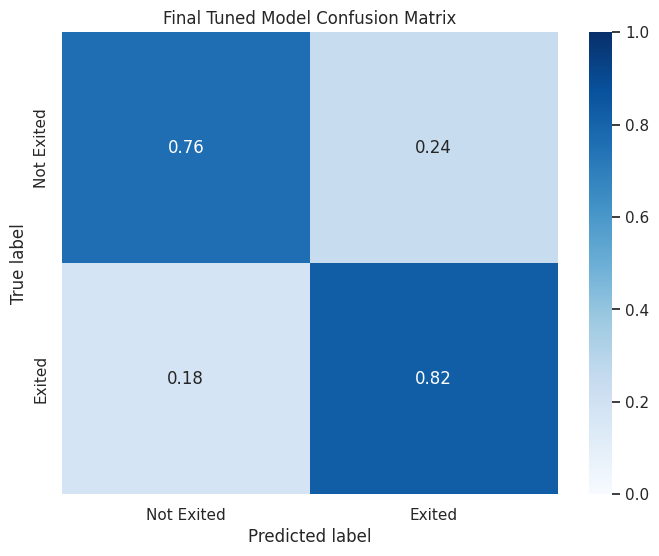

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Final Champion Model Evaluation ---")

# 1. Make predictions on the test set using your best model
y_test_pred_final = best_model.predict(X_test)

# 2. Define the reusable Confusion Matrix plotting function
def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    """Plots a confusion matrix."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0, vmax=1, annot=True, cmap="Blues", fmt='.2f')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 3. Calculate and plot the final, normalized confusion matrix
# 'normalize='true'' shows the percentage (recall) for each class
cm_final = confusion_matrix(y_test, y_test_pred_final, normalize='true')

plot_confusion_matrix(cm_final, classes=["Not Exited", "Exited"], title="Final Tuned Model Confusion Matrix")


--- Final Champion Model Evaluation ---


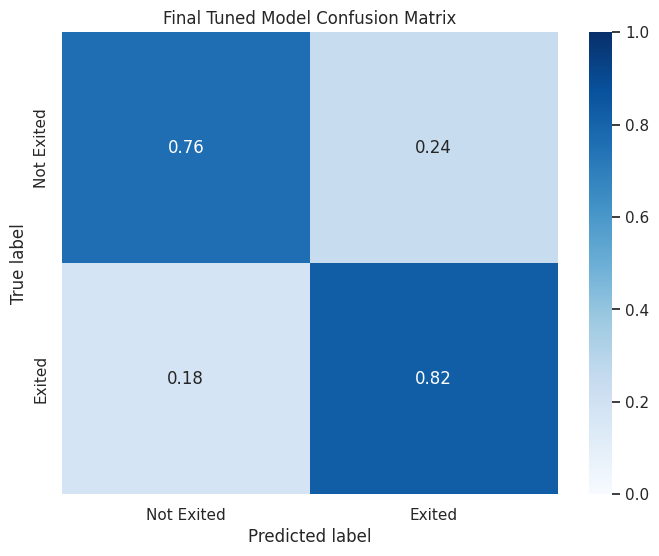


Final Classification Report:
              precision    recall  f1-score   support

  Not Exited       0.95      0.76      0.84      1607
      Exited       0.45      0.82      0.58       393

    accuracy                           0.77      2000
   macro avg       0.70      0.79      0.71      2000
weighted avg       0.85      0.77      0.79      2000


--- Storing Final Feature Importances ---
Final feature importance data exported successfully!

Final Model Feature Importance:
              Feature  Importance  Feature Importance Score
4       NumOfProducts    0.220217                    0.2202
1                 Age    0.203154                    0.2032
14   IsActiveMember_1    0.133495                    0.1335
13   IsActiveMember_0    0.116583                    0.1166
7   Geography_Germany    0.065774                    0.0658

--- Storing Final Predictions ---
Final data with predictions exported successfully!

--- Saving Final Model and Scaler ---
Champion model and scaler sav

In [24]:
# =============================================================================
# 7. FINAL MODEL EVALUATION
# =============================================================================
print("\n--- Final Champion Model Evaluation ---")

# --- 7.1. Final Predictions and Confusion Matrix ---
# Make predictions on the test set using your best model from the search
y_test_pred_final = best_model.predict(X_test)

# Define the reusable Confusion Matrix plotting function
def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    """Plots a normalized confusion matrix."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0, vmax=1, annot=True, cmap="Blues", fmt='.2f')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Calculate and plot the final, normalized confusion matrix
cm_final = confusion_matrix(y_test, y_test_pred_final, normalize='true')
plot_confusion_matrix(cm_final, classes=["Not Exited", "Exited"], title="Final Tuned Model Confusion Matrix")

# --- 7.2. Final Classification Report ---
# Display a detailed report of precision, recall, and f1-score
print("\nFinal Classification Report:")
print(classification_report(y_test, y_test_pred_final, target_names=["Not Exited", "Exited"]))


# =============================================================================
# 8. FINAL FEATURE IMPORTANCE AND RESULTS
# =============================================================================

# --- 8.1. Create and Store FINAL Feature Importance ---
# This is the corrected step: Create the DataFrame from your BEST model
print("\n--- Storing Final Feature Importances ---")
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Add a rounded score column for better presentation
feature_importance['Feature Importance Score'] = feature_importance['Importance'].round(4)

# Save the final DataFrame to an Excel file
feature_importance.to_excel("feature_importance.xlsx", index=False)

print("Final feature importance data exported successfully!")
print("\nFinal Model Feature Importance:")
print(feature_importance.head())


# --- 8.2. Store Final Predictions ---
print("\n--- Storing Final Predictions ---")
# Make predictions on the entire preprocessed dataset (X)
all_df_predict = best_model.predict(X)
all_df_predict_prob = best_model.predict_proba(X)

# Create a new DataFrame for the results
results_df = new_raw_data.copy()

# Add the prediction and probability columns to this new DataFrame
results_df['Exited_Prediction'] = all_df_predict
results_df['Exited_Probability'] = all_df_predict_prob[:, 1]

# (Optional) Join with original data to get columns like 'Surname'
results_df = raw_data[['CustomerId', 'Surname']].join(results_df)

# Export the final DataFrame with predictions to Excel
results_df.to_excel("bank_churn_predictions.xlsx", index=False)

print("Final data with predictions exported successfully!")


# =============================================================================
# 9. SAVING THE MODEL ITSELF
# =============================================================================
print("\n--- Saving Final Model and Scaler ---")
# Save the best_model to a file for the Streamlit app
with open('best_churn_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Save the scaler object as well
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Champion model and scaler saved successfully!")

verify

In [25]:
import pickle
import pandas as pd

# Load the trained model
with open('best_churn_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the scaler
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [26]:
user_inputs = {
    'CreditScore': 600,
    'Age': 30,
    'Tenure': 2,
    'Balance': 8000,
    'NumOfProducts': 2,
    'EstimatedSalary': 60000,
    'Geography_France': True,
    'Geography_Germany': False,
    'Geography_Spain': False,
    'Gender_Female': True,
    'Gender_Male': False,
    'HasCrCard_0': False,
    'HasCrCard_1': True,
    'IsActiveMember_0': False,
    'IsActiveMember_1': True
}

# Convert the dictionary to a DataFrame
input_data = pd.DataFrame([user_inputs])

#testing

In [27]:
import pickle
import pandas as pd

with open('best_churn_model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

user input

In [28]:
user_inputs = {
    'CreditScore': 600,
    'Age': 30,
    'Tenure': 2,
    'Balance': 8000,
    'NumOfProducts': 2,
    'EstimatedSalary': 60000,
    'Geography_France': True,
    'Geography_Germany': False,
    'Geography_Spain': False,
    'Gender_Female': True,
    'Gender_Male': False,
    'HasCrCard_0': False,
    'HasCrCard_1': True,
    'IsActiveMember_0': False,
    'IsActiveMember_1': True
}

In [29]:
input_data = pd.DataFrame([user_inputs])
input_data = input_data[X_train.columns]
cols_to_scale = scaler.feature_names_in_
input_data[cols_to_scale] = scaler.transform(input_data[cols_to_scale])


prediction

In [30]:
prediction = model.predict(input_data)
probabilities = model.predict_proba(input_data)


COMPARE THE RESULTS

In [31]:
prediction_label = "Retain" if prediction[0] == 0 else "Churn"
prob_retain = probabilities[0][0]
prob_churn = probabilities[0][1]

print(f"--- Jupyter Notebook Verification ---")
print(f"Predicted Value: {prediction_label}")
print(f"Predicted Probability (Churn): {prob_churn:.2%}")
print(f"Predicted Probability (Retain): {prob_retain:.2%}")

--- Jupyter Notebook Verification ---
Predicted Value: Retain
Predicted Probability (Churn): 26.98%
Predicted Probability (Retain): 73.02%
